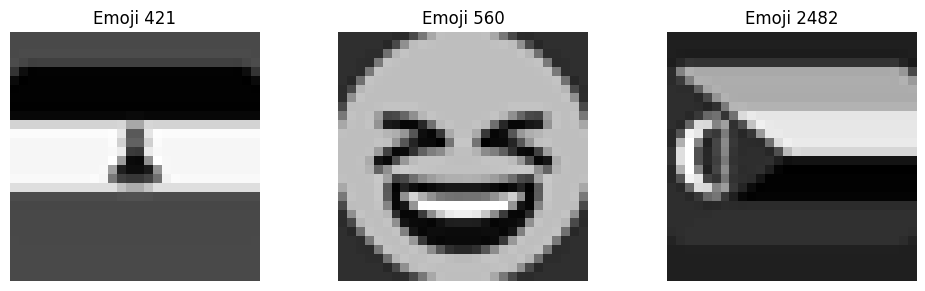

Epoch 1/500 complete with average loss: 556.4310945185847
Epoch 2/500 complete with average loss: 541.2379525771754
Epoch 3/500 complete with average loss: 539.8037454979351
Epoch 4/500 complete with average loss: 539.1514883500001
Epoch 5/500 complete with average loss: 538.6723226722938
Epoch 6/500 complete with average loss: 538.4624262240233
Epoch 7/500 complete with average loss: 538.1909921851983
Epoch 8/500 complete with average loss: 537.5454704681238
Epoch 9/500 complete with average loss: 536.2053259993829
Epoch 10/500 complete with average loss: 533.0923184459365
Epoch 11/500 complete with average loss: 530.6180464196538
Epoch 12/500 complete with average loss: 529.6019433017766
Epoch 13/500 complete with average loss: 528.8161217997582
Epoch 14/500 complete with average loss: 528.5967743214939
Epoch 15/500 complete with average loss: 527.6863772760997
Epoch 16/500 complete with average loss: 527.8620270380237
Epoch 17/500 complete with average loss: 527.3061195996479
Epoch 

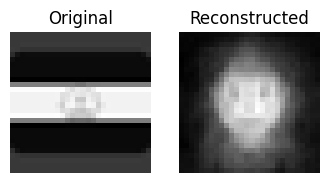

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from core.activation_function import ActivationFunction
from core.optimizer import Optimizer
from core.vae import VAE

# Function to prepare the emoji dataset
def prepare_emoji_data():
    """
    Prepares the Emoji dataset for training and visualization.
    """
    # Load the dataset from a local .npz file
    data = np.load("../data/emoji_dataset.npz")
    x_train, x_test = data["x_train"], data["x_test"]

    # Normalize the images between 0 and 1
    x_visual = x_train.astype("float32") / 255.0  # For visualization purposes
    x_train = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2]).astype("float32") / 255
    x_test = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2]).astype("float32") / 255

    # Create training and test pairs for unsupervised learning
    training_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in x_train]
    test_data = [(x.reshape(-1, 1), x.reshape(-1, 1)) for x in x_test]

    return training_data, test_data, x_visual

# Load the training, test data, and visual data
training_data, test_data, x_visual = prepare_emoji_data()

# Plot some sample emojis
random_indices = np.random.choice(len(x_visual), 3, replace=False)
plt.figure(figsize=(10, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_visual[idx], cmap="gray")
    plt.title(f"Emoji {idx}")
    plt.axis("off")

plt.tight_layout()
plt.show()
# Define the encoder and decoder topologies
latent_dim = 16  # Smaller latent space since emojis are simpler
encoder_topology = [x_visual.shape[1] * x_visual.shape[2], 500, 300,  128, 64, 2 * latent_dim]
decoder_topology = [latent_dim, 64, 128, 300, 500, x_visual.shape[1] * x_visual.shape[2]]

# Configure optimizers
encoder_optimizer = Optimizer(method="adam", eta=0.01)
decoder_optimizer = Optimizer(method="adam", eta=0.01)

# Configure the activation function
activation_function = ActivationFunction(method="relu")

# Create the VAE model
vae = VAE(
    seed=42,
    encoder_topology=encoder_topology,
    decoder_topology=decoder_topology,
    activation_function=activation_function,
    encoder_optimizer=encoder_optimizer,
    decoder_optimizer=decoder_optimizer
)

# Train the VAE
vae.fit(
    training_data=training_data,  # Use a subset of the data for faster training
    epochs=500,
    mini_batch_size=32
)

# Test the VAE with a single emoji
test_sample, _ = test_data[0]
recon_x, _, _, _, _, _, _, _, _ = vae.feedforward(test_sample)

# Visualize the original and reconstructed emojis
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(test_sample.reshape(x_visual.shape[1], x_visual.shape[2]), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(recon_x.reshape(x_visual.shape[1], x_visual.shape[2]), cmap="gray")
plt.title("Reconstructed")
plt.axis("off")

plt.show()


In [39]:
len(training_data)


2951

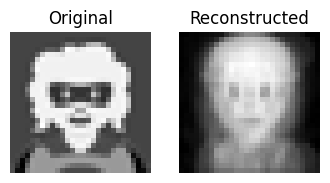

In [97]:

# Test the VAE with a single emoji
test_sample, _ = test_data[2]
recon_x, _, _, _, _, _, _, _, _ = vae.feedforward(test_sample)

# Visualize the original and reconstructed emojis
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(test_sample.reshape(x_visual.shape[1], x_visual.shape[2]), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(recon_x.reshape(x_visual.shape[1], x_visual.shape[2]), cmap="gray")
plt.title("Reconstructed")
plt.axis("off")

plt.show()


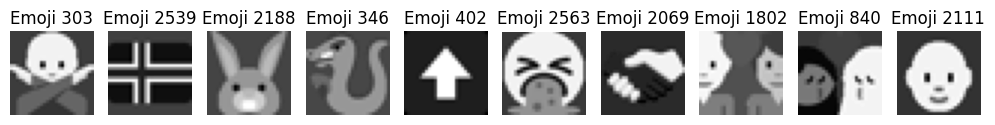

In [122]:
# Plot some sample emojis
random_indices = np.random.choice(len(x_visual), 10, replace=False)
plt.figure(figsize=(10, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_visual[idx], cmap="gray")
    plt.title(f"Emoji {idx}")
    plt.axis("off")

plt.tight_layout()
plt.show()


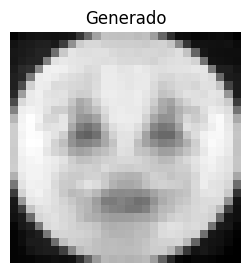

In [135]:
# Generar una nueva imagen aleatoria desde el espacio latente
z_random = np.random.normal(size=(vae.latent_dim, 1))  # Vector aleatorio en el espacio latente
generated_x, _, _ = vae.decode(z_random)  # Decodificar desde el vector latente

# Visualizar la imagen generada
plt.figure(figsize=(3, 3))
plt.imshow(generated_x.reshape(x_visual.shape[1], x_visual.shape[2]), cmap="gray")
plt.title("Generado")
plt.axis("off")
plt.show()
